In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("Uber Cleaned Dataset.csv")
df.head()

,timestamp,date,hour,day_of_week,month,source,destination,ride_company,vehicle,visibility,...,distance,surge_multiplier,fare,humidity,wind_speed,weather_desc_short,weather_desc_long,weather_status,pressure,temperature_C
0,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Boston University,Financial District,Lyft,Lux Black,1.685,...,4.46,1.75,62.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
1,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Boston University,Financial District,Lyft,Lux,1.685,...,4.46,1.75,47.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
2,2018-11-26 03:40:46,2018-11-26,3,Monday,11,North Station,Fenway,Uber,WAV,1.685,...,3.05,1.00,10.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
3,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Boston University,Theatre District,Lyft,Lux Black XL,1.685,...,3.03,1.00,34.0,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
4,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Northeastern University,Beacon Hill,Lyft,Lyft,1.685,...,2.43,1.00,10.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637194 entries, 0 to 637193
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           637194 non-null  object 
 1   date                637194 non-null  object 
 2   hour                637194 non-null  int64  
 3   day_of_week         637194 non-null  object 
 4   month               637194 non-null  int64  
 5   source              637194 non-null  object 
 6   destination         637194 non-null  object 
 7   ride_company        637194 non-null  object 
 8   vehicle             637194 non-null  object 
 9   visibility          637194 non-null  float64
 10  cloud_cover         637194 non-null  float64
 11  uv_index            637194 non-null  int64  
 12  distance            637194 non-null  float64
 13  surge_multiplier    637194 non-null  float64
 14  fare                637194 non-null  float64
 15  humidity            637194 non-nul

In [39]:
df.describe()

,hour,month,visibility,cloud_cover,uv_index,distance,surge_multiplier,fare,humidity,wind_speed,pressure,temperature_C
count,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000,637194.000000
mean,11.617813,11.586788,8.469312,0.686230,0.249075,2.165190,1.015086,16.563923,0.741046,6.200890,1010.098543,2.229213
std,6.948664,0.492411,2.601731,0.358629,0.474355,1.074128,0.095479,9.379179,0.138584,3.152245,13.474334,4.451707
min,0.000000,11.000000,0.717000,0.000000,0.000000,0.020000,1.000000,2.500000,0.380000,0.450000,988.090000,-11.040000
25%,6.000000,11.000000,8.432000,0.370000,0.000000,1.300000,1.000000,9.000000,0.640000,3.410000,999.840000,-0.050000
50%,12.000000,12.000000,9.880000,0.820000,0.000000,2.165190,1.000000,13.500000,0.710000,5.920000,1009.250000,2.210000
75%,18.000000,12.000000,9.996000,1.000000,0.000000,2.880000,1.000000,22.500000,0.880000,8.410000,1021.860000,4.840000
max,23.000000,12.000000,10.000000,1.000000,2.000000,6.130000,3.000000,100.000000,0.960000,15.850000,1035.550000,14.350000


In [40]:
df.isnull().sum()

timestamp             0
date                  0
hour                  0
day_of_week           0
month                 0
source                0
destination           0
ride_company          0
vehicle               0
visibility            0
cloud_cover           0
uv_index              0
distance              0
surge_multiplier      0
fare                  0
humidity              0
wind_speed            0
weather_desc_short    0
weather_desc_long     0
weather_status        0
pressure              0
temperature_C         0
dtype: int64

Intuitively, distance seem to be the biggest factor to fare. 

Text(0.5, 1.0, 'Fare vs Distance')

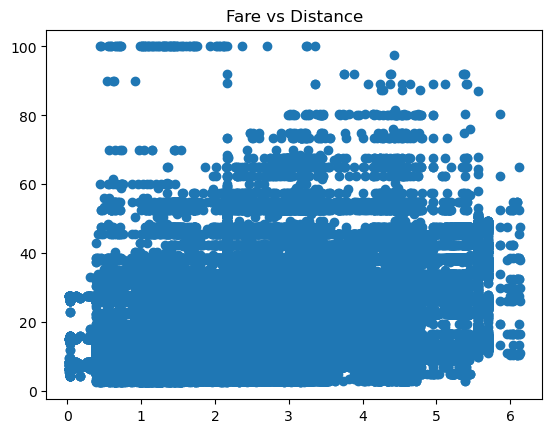

In [42]:
plt.scatter(df["distance"],df["fare"])
plt.title("Fare vs Distance")

In [33]:
df[["fare","distance"]].corr()

,fare,distance
fare,1.000000,0.332812
distance,0.332812,1.000000


To understand the relationship between fare and distance, We plotted the distance vs fare and calculated their correlation. The overall correlation coefficient is 0.33, indicating a weak to moderate linear relationship. This suggests that distance alone does not fully explain fare variations.
Several other factors influence the final fare, including the ride company and the type of vehicle used. For example, luxury vehicles typically charge higher rates for the same distance compared to standard vehicles. Therefore, it's important to consider these variables when analyzing fare patterns.

In [37]:
print(f"Lyft:\n {df[df["ride_company"]=='Lyft'][["fare","distance"]].corr()}" )
print(f"Uber:\n {df[df["ride_company"]=='Uber'][["fare","distance"]].corr()}" )

Lyft:
              fare  distance
fare      1.00000   0.35281
distance  0.35281   1.00000
Uber:
               fare  distance
fare      1.000000  0.312105
distance  0.312105  1.000000


Difference in Ride company don't change the correlation much.

In [19]:
df["vehicle"].unique()

array(['Lux Black', 'Lux', 'WAV', 'Lux Black XL', 'Lyft', 'UberX',
       'Shared', 'UberXL', 'Black SUV', 'Black', 'Lyft XL', 'UberPool'],
      dtype=object)

In [31]:
for vehicle in df["vehicle"].unique():
    print(f"{vehicle}: {df[df["vehicle"]==vehicle][["fare","distance"]].corr()["fare"]["distance"].round(2)}")

Lux Black: 0.81
Lux: 0.83
WAV: 0.69
Lux Black XL: 0.69
Lyft: 0.77
UberX: 0.69
Shared: 0.26
UberXL: 0.75
Black SUV: 0.78
Black: 0.85
Lyft XL: 0.81
UberPool: 0.59


All vehicle types show a strong positive correlation between fare and distance, except for Shared rides, which surprisingly show a much weaker correlation.

### Investigating Shared Ride Fares

In [65]:
df[df["vehicle"]=='Shared'].head()

,timestamp,date,hour,day_of_week,month,source,destination,ride_company,vehicle,visibility,...,distance,surge_multiplier,fare,humidity,wind_speed,weather_desc_short,weather_desc_long,weather_status,pressure,temperature_C
7,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Beacon Hill,Boston University,Lyft,Shared,1.685,...,2.30,1.0,3.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
8,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Theatre District,Northeastern University,Lyft,Shared,1.685,...,2.22,1.0,7.0,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
23,2018-11-26 03:40:47,2018-11-26,3,Monday,11,Theatre District,Fenway,Lyft,Shared,1.685,...,3.26,1.0,7.0,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
44,2018-11-26 03:40:47,2018-11-26,3,Monday,11,North End,West End,Lyft,Shared,1.685,...,1.23,1.0,5.0,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
62,2018-11-26 03:40:48,2018-11-26,3,Monday,11,Back Bay,Haymarket Square,Lyft,Shared,1.685,...,2.31,1.0,3.0,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46


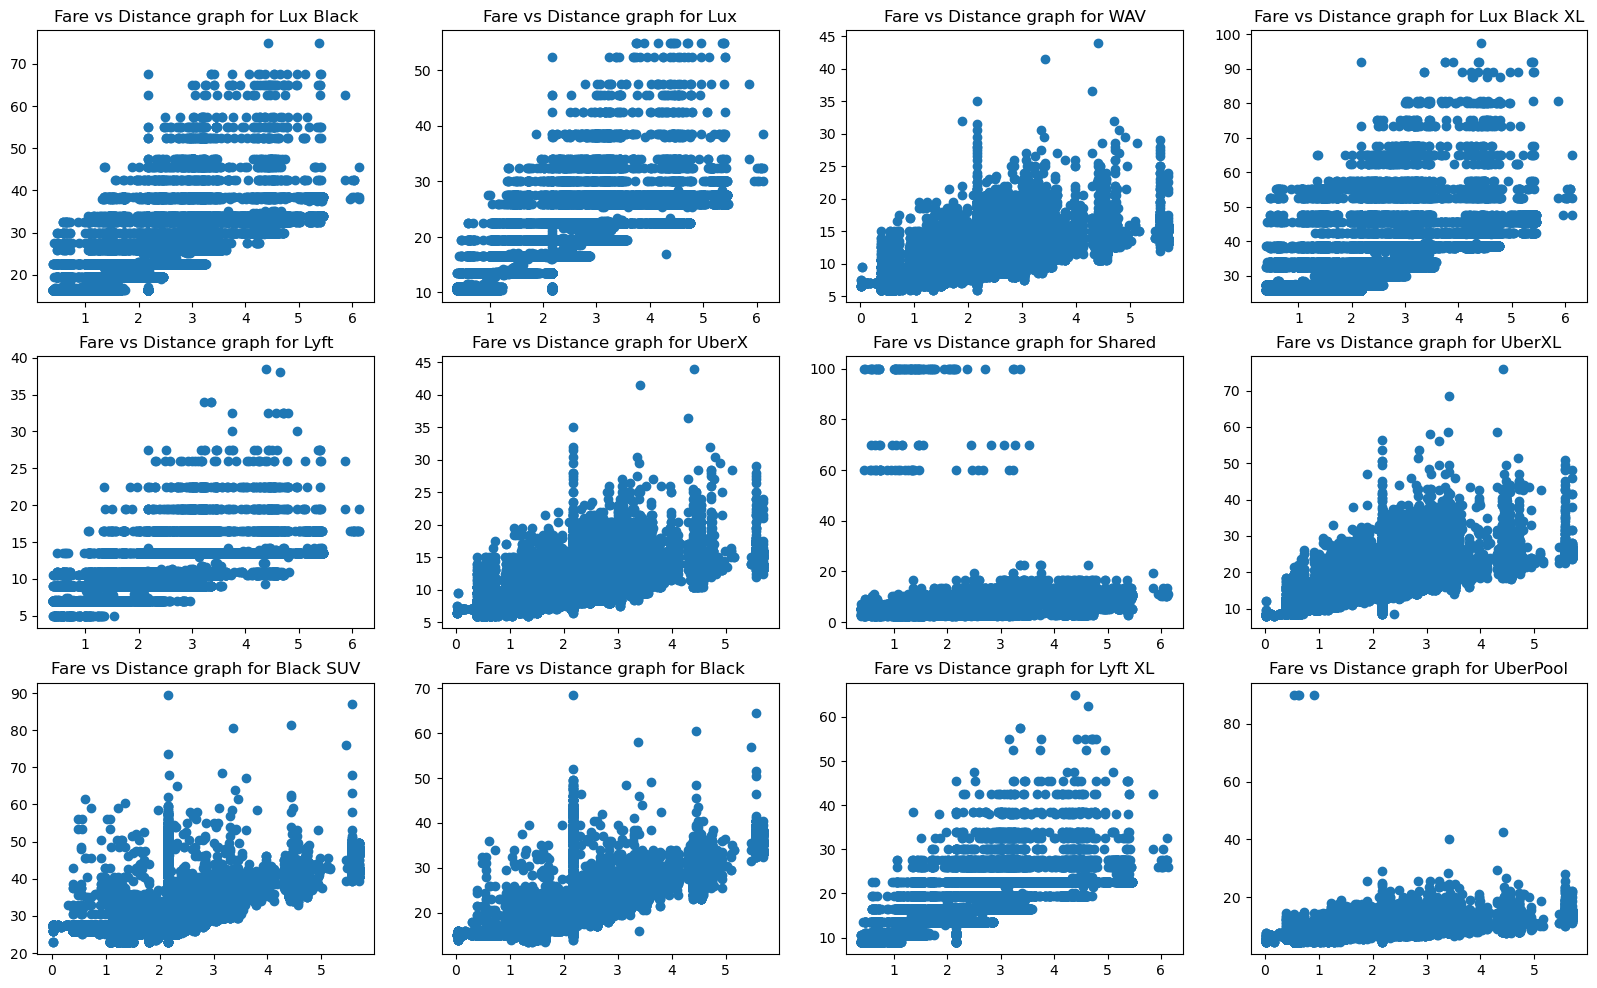

In [83]:
plt.figure(figsize=(20,12))
i = 0
for vehicle in df["vehicle"].unique():
    i+=1
    plt.subplot(3,4,i)
    plt.scatter(df[df["vehicle"]==vehicle]["distance"], df[df["vehicle"]==vehicle]["fare"])
    plt.title(f"Fare vs Distance graph for {vehicle}")
    
plt.show()

We notice a few unusual fare values (e.g., $60, $70, $100) for short distances, which is unrealistic in Shared rides.

In [76]:
df[ (df["fare"]>=50) & (df["vehicle"]=='Shared') ]

,timestamp,date,hour,day_of_week,month,source,destination,ride_company,vehicle,visibility,...,distance,surge_multiplier,fare,humidity,wind_speed,weather_desc_short,weather_desc_long,weather_status,pressure,temperature_C
485,2018-11-26 05:03:01,2018-11-26,5,Monday,11,Back Bay,Boston University,Lyft,Shared,4.675,...,1.45,1.0,100.0,0.91,0.53,Overcast,"Rain until morning, starting again in the eve...",cloudy,1014.11,5.55
1128,2018-11-26 06:14:19,2018-11-26,6,Monday,11,Northeastern University,Back Bay,Lyft,Shared,5.589,...,1.45,1.0,100.0,0.92,1.83,Overcast,"Rain until morning, starting again in the eve...",cloudy,1014.32,5.46
10781,2018-11-26 13:38:10,2018-11-26,13,Monday,11,South Station,Financial District,Lyft,Shared,3.058,...,0.66,1.0,60.0,0.92,3.40,Overcast,"Rain until morning, starting again in the eve...",cloudy,1014.88,4.19
20308,2018-11-26 19:47:10,2018-11-26,19,Monday,11,Beacon Hill,Haymarket Square,Lyft,Shared,8.286,...,1.30,1.0,100.0,0.85,7.55,Overcast,"Rain until morning, starting again in the eve...",cloudy,1009.80,4.98
24791,2018-11-26 22:41:43,2018-11-26,22,Monday,11,Haymarket Square,West End,Lyft,Shared,9.967,...,0.67,1.0,60.0,0.88,7.02,Possible Drizzle,"Rain until morning, starting again in the eve...",rain,1009.43,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618727,2018-12-18 08:35:07,2018-12-18,8,Tuesday,12,Fenway,West End,Lyft,Shared,9.375,...,2.82,1.0,70.0,0.54,12.82,Overcast,Mostly cloudy throughout the day.,cloudy,1003.34,-7.17
621722,2018-12-18 10:20:04,2018-12-18,10,Tuesday,12,Financial District,South Station,Lyft,Shared,9.734,...,0.44,1.0,100.0,0.52,14.15,Mostly Cloudy,Mostly cloudy throughout the day.,partly cloudy,1005.95,-10.42
623526,2018-12-18 11:20:09,2018-12-18,11,Tuesday,12,Back Bay,South Station,Lyft,Shared,9.901,...,1.34,1.0,60.0,0.51,15.00,Mostly Cloudy,Mostly cloudy throughout the day.,partly cloudy,1006.60,-10.97
625910,2018-12-18 12:45:06,2018-12-18,12,Tuesday,12,North End,North Station,Lyft,Shared,9.948,...,1.09,1.0,100.0,0.50,14.95,Mostly Cloudy,Mostly cloudy throughout the day.,partly cloudy,1007.14,-11.04


In [78]:
len(df[ (df["fare"].isin([60,70,100])) & (df["vehicle"]=='Shared') ]) / len(df[df["vehicle"]=="Shared"]) *100

0.0

Only 0.25% of the Shared ride records have these unusually high fares. These are likely data entry errors or anomalies.

In [64]:
df[ (df["vehicle"]=="Shared") & (df["fare"]<60) ] [["fare","distance"]] .corr()

,fare,distance
fare,1.000000,0.637089
distance,0.637089,1.000000


After excluding the outliers, the correlation between fare and distance for UberPool (shared ride) improves significantly to 0.64, aligning better with other vehicle types.

In [77]:
df = df[~ ( (df["vehicle"]=="Shared") & (df["fare"]>50) ) ]

In [66]:
df[ (df["vehicle"]=="UberPool") & (df["fare"]<50) ] [["fare","distance"]] .corr()

,fare,distance
fare,1.000000,0.629485
distance,0.629485,1.000000


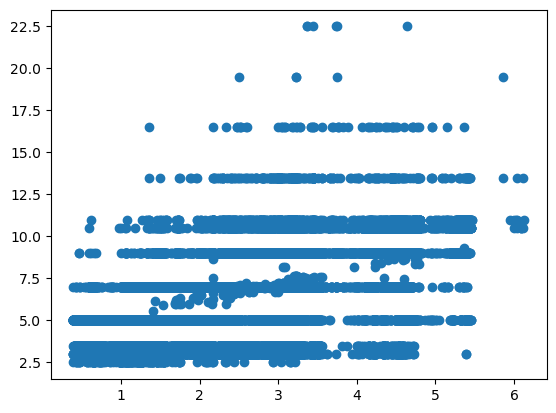

In [73]:
plt.scatter(df[(df["vehicle"]=="Shared") & (df["fare"]<60)]["distance"], df[(df["vehicle"]=="Shared") & (df["fare"]<60)]["fare"])

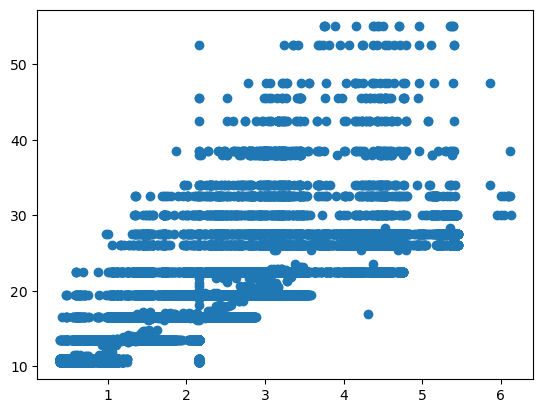

In [67]:
plt.scatter(df[df["vehicle"]=='Lux']["distance"], df[df["vehicle"]=='Lux']["fare"])

In [49]:
temp_df = df[["visibility",'cloud_cover',
       'uv_index', 'distance', 'fare', 'humidity',
       'wind_speed','pressure', 'temperature_C']]
temp_df.corr()["fare"][:]

visibility       0.001290
cloud_cover      0.000720
uv_index        -0.000633
distance         0.332812
fare             1.000000
humidity        -0.001265
wind_speed       0.001212
pressure         0.000787
temperature_C   -0.000178
Name: fare, dtype: float64

In [43]:
df.columns

Index(['timestamp', 'date', 'hour', 'day_of_week', 'month', 'source',
       'destination', 'ride_company', 'vehicle', 'visibility', 'cloud_cover',
       'uv_index', 'distance', 'surge_multiplier', 'fare', 'humidity',
       'wind_speed', 'weather_desc_short', 'weather_desc_long',
       'weather_status', 'pressure', 'temperature_C'],
      dtype='object')